In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

print(len(train_images))

60000


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

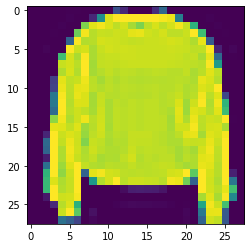

In [9]:
class_names = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(train_images[0].shape)
print(train_images[0])
plt.imshow(train_images[7])

In [10]:
#data normalization
train_images, test_images = train_images/255, test_images/255

In [12]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.5013 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3724 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3104 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2936 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2783 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2541 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ", test_acc)
print("Loss: ", test_loss)

313/313 [==============================] - 0s 729us/step - loss: 0.3376 - accuracy: 0.8796
Accuracy:  0.8795999884605408
Loss:  0.3375702500343323


In [26]:
prediction = model.predict(test_images)

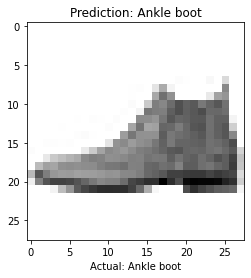

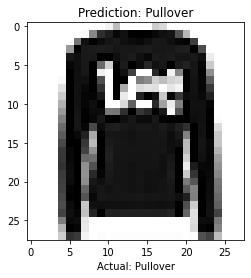

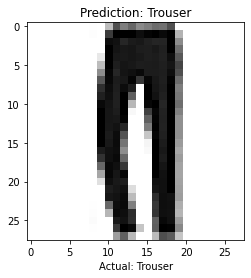

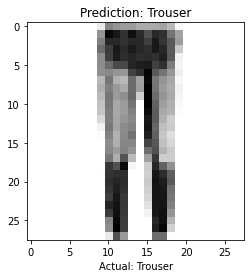

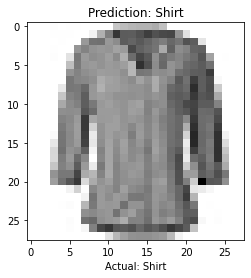

In [35]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()